In [1]:
import pandas as pd

cols = "RectCoverage,AvgRectArea,RectStDev,AspectRatio,AvgLineBends,AvgLineLength,LongestLine,ShortestLine,LineLengthStDev,AvgLineAngle,OrthLinesRatio,LineCrossings,AvgCrossingAngle,AvgShortestDistance,RectDistribution,RectOrth2,rectangles,lines,Quality".split(',')

df = pd.read_csv('../03-features-labels/dataset.csv')
df = df.drop(columns=(c for c in df.columns if c not in cols))
df['quality_str'] = [str(x) for x in df['Quality']]
df.head()

,RectCoverage,AvgRectArea,RectStDev,AspectRatio,AvgLineBends,AvgLineLength,LongestLine,ShortestLine,LineLengthStDev,AvgLineAngle,OrthLinesRatio,LineCrossings,AvgCrossingAngle,AvgShortestDistance,RectDistribution,RectOrth2,rectangles,lines,Quality,quality_str
0,0.588609,35509.68750,0.723755,1.311189,0.333333,288.193085,464.000000,159.033325,0.281562,5.569370,0.750000,0.022059,70.414215,184.124695,0.323431,0.062500,16,12,2.5,2.5
1,0.236967,6056.43750,0.257714,0.904311,0.903226,244.743561,818.250916,31.000000,0.882926,10.187655,0.423729,0.014689,41.226490,82.908066,0.440845,1.375000,32,31,3.5,3.5
2,0.550997,49011.19922,0.551558,1.264755,2.000000,943.000549,1110.000854,612.000000,0.248203,0.021203,1.000000,0.111111,89.942734,255.250641,0.266604,0.400000,5,3,3.5,3.5
3,0.464038,44715.71484,0.880319,1.006045,1.857143,620.428101,1643.174194,73.000000,0.740247,12.319095,0.412500,0.028704,62.122978,250.194214,0.184616,0.285714,14,28,1.0,1.0
4,0.165999,4485.50000,0.550322,2.355795,1.333333,291.010010,591.294006,123.369362,0.614788,7.233784,0.523810,0.021645,45.909721,96.337021,0.333333,0.333333,12,9,2.0,2.0


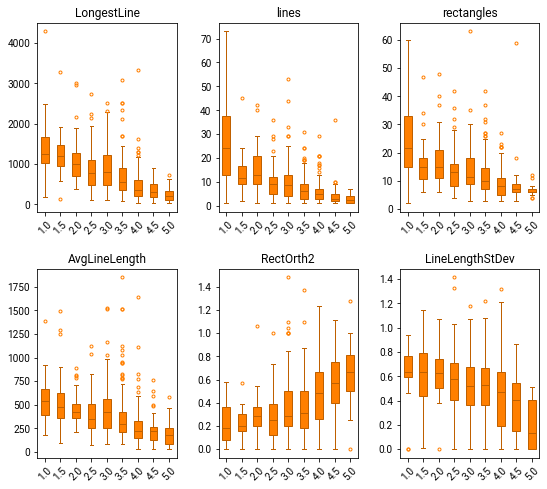

In [2]:
from matplotlib import pyplot as plt
from numpy import median
import numpy as np

features = 'LongestLine,lines,rectangles,AvgLineLength,RectOrth2,LineLengthStDev'.split(',')
classes = [f"{(x+2)/2:.1f}" for x in range(9)]

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Roboto']

c, d = '#FF7F00', '#BF6000'
plt.figure(1, figsize=(len(features)*1.5,8))
plt.subplots_adjust(wspace= 0.3, hspace=0.3)
for i,f in enumerate(features):
    data = []
    for cls in classes:
        rows = df.loc[df['quality_str']==cls]
        dp = [i for i in rows[f]]
        data.append(dp)

    avg = [(j,median(dp)) for (j,dp) in enumerate(data)]
    sorted_avg = sorted(avg, key=lambda x: x[1])
    plt.subplot(2,len(features)//2,i+1)
    bp_dict = plt.boxplot(data, 
                # positions=pos, 
                labels=classes, patch_artist=True,
                sym='.',
                boxprops=dict(facecolor=c, color=d),
                capprops=dict(color=d),
                whiskerprops=dict(color=d),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=d))
    plt.title(f)
    plt.xticks(rotation=45)

plt.show()

<Figure size 432x288 with 0 Axes>

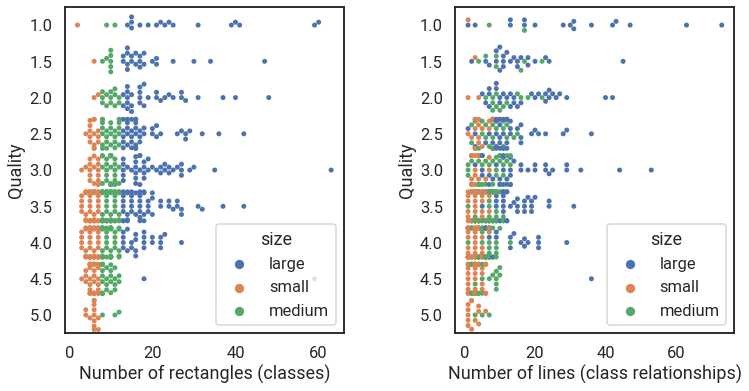

In [3]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style= 'white', context= 'talk') 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Roboto']

df['size'] = [('small' if r<8 else 'medium' if r<13 else 'large') for r in df['rectangles']]

plt.figure(2)
fig, axes = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(wspace=.4)

sns.swarmplot(ax=axes[0], x='rectangles', y='quality_str', data=df,
    order=classes,
    hue='size')
axes[0].set_xlabel('Number of rectangles (classes)')
axes[0].set_ylabel('Quality')

sns.swarmplot(ax=axes[1], x='lines', y='quality_str', data=df,
    order=classes,
    hue='size')
axes[1].set_xlabel('Number of lines (class relationships)')
axes[1].set_ylabel('Quality')

plt.show()

<Figure size 432x288 with 0 Axes>

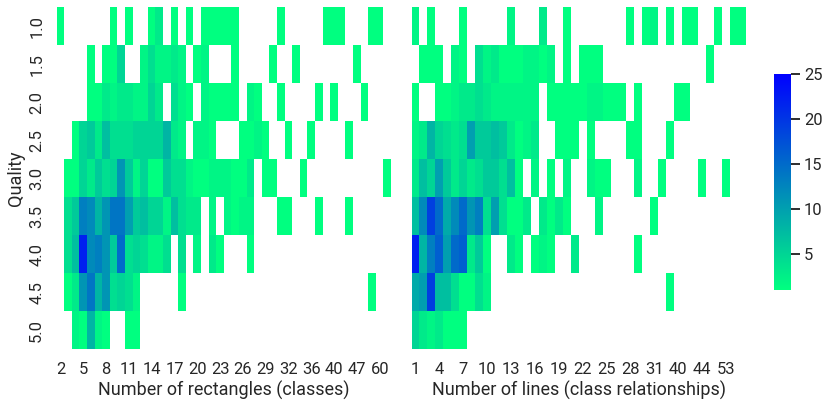

In [4]:
import seaborn as sns

plt.figure(3)

fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True)
cbar_ax = fig.add_axes([.91, .3, .02, .5])

sns.heatmap(ax= axes[0],
    data= df.groupby(["rectangles", "Quality"])
          .size()
          .unstack(level=0),
    cmap= 'winter_r',
    # linewidths=1,
    # linecolor='silver',
    vmin=1, vmax=25,
    cbar=False
)
axes[0].set_xlabel('Number of rectangles (classes)')
sns.heatmap(ax= axes[1],
    data= df.groupby(["lines", "Quality"])
          .size()
          .unstack(level=0),
    cmap= 'winter_r',
    # linewidths=1,
    # linecolor='silver',
    vmin=1, vmax=25,
    cbar=True,
    cbar_ax=cbar_ax
)
axes[1].set_xlabel('Number of lines (class relationships)')
axes[1].set_ylabel(None)
fig.tight_layout(rect=[0, 0, .9, 1])
